Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 30474269.93it/s]


Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 961226.56it/s]

Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8462021.12it/s]


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6879930.94it/s]


Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw

Train dataset size: 60000 
Test dataset size: 10000
Total parameters in the model: 407050
Epoch: 1, Step [1/600], Loss: 2.3119
Epoch: 1, Step [501/600], Loss: 2.3133
Test Accuracy: 12.12% | Test Loss: 2.3053075456619263
Epoch: 2, Step [1/600], Loss: 2.3042
Epoch: 2, Step [501/600], Loss: 2.3017
Test Accuracy: 10.81% | Test Loss: 2.3046207308769224
Epoch: 3, Step [1/600], Loss: 2.2983
Epoch: 3, Step [501/600], Loss: 2.2875
Test Accuracy: 10.11% | Test Loss: 2.3065119624137878
Epoch: 4, Step [1/600], Loss: 2.2961
Epoch: 4, Step [501/600], Loss: 2.2921
Test Accuracy: 11.39% | Test Loss: 2.3072786116600037
Epoch: 5, Step [1/600], Loss: 2.2935
Epoch: 5, Step [501/600], Loss: 2.2899
Test Accuracy: 9.79% | Test Loss: 2.3142149305343627
Epoch: 6, Step [1/600], Loss: 2.2720
Epoch: 6, Step [501/600], Loss: 2.2584
Test Accuracy: 10.54% | Test Loss: 2.3077377557754515
Epoch: 7, Step [1/600], Loss: 2.2721
Epoch: 7, Ste

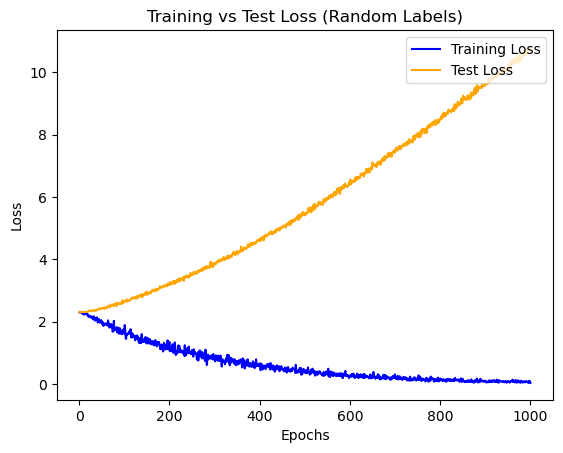

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

torch.manual_seed(42)

# Downloading the MNIST dataset
train_data = torchvision.datasets.MNIST(root='./dataset', 
                                        train=True, 
                                        transform=transforms.Compose([
                                            transforms.ToTensor(),
                                        ]),  
                                        download=True)

test_data = torchvision.datasets.MNIST(root='./dataset', 
                                       train=False, 
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                       ]))

print("Train dataset size:", len(train_data), "\nTest dataset size:", len(test_data))

# Randomizing the labels for training data
random_labels = torch.tensor(np.random.randint(0, 10, (len(train_data)),))
train_data.targets = random_labels

# Creating DataLoaders
train_dataloader = torch.utils.data.DataLoader(dataset=train_data, 
                                               batch_size=100, 
                                               shuffle=True)

test_dataloader = torch.utils.data.DataLoader(dataset=test_data, 
                                              batch_size=100, 
                                              shuffle=False)

# Define the neural network architecture
class RandomMNIST(nn.Module):
    def __init__(self):
        super(RandomMNIST, self).__init__()
        self.layer1 = nn.Linear(784, 512)
        self.layer2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Training function
def train_model(model, optimizer, epoch, data_loader, log_interval):
    model.train()
    criterion = nn.CrossEntropyLoss()
    correct = 0
    total = 0
    
    for batch_idx, (inputs, targets) in enumerate(data_loader):
        inputs, targets = Variable(inputs), Variable(targets)
        
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()

        _, predictions = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predictions == targets).sum().item()
        accuracy = 100.0 * correct / total

        if batch_idx % log_interval == 0:
            print(f'Epoch: {epoch}, Step [{batch_idx + 1}/{len(data_loader)}], Loss: {loss.item():.4f}')
    
    return loss.item(), round(accuracy, 2)

def test_model(model, epoch, data_loader):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    loss_function = nn.CrossEntropyLoss()
    batch_count = 0
    
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = Variable(inputs), Variable(targets)
            outputs = model(inputs)
            test_loss += loss_function(outputs, targets).item()
            
            _, predictions = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predictions == targets).sum().item()
            batch_count += 1

        avg_loss = test_loss / batch_count
        accuracy = 100.0 * correct / total
        print(f'Test Accuracy: {accuracy}% | Test Loss: {avg_loss}')
    
    return accuracy, avg_loss

random_mnist_model = RandomMNIST()
optimizer = torch.optim.Adam(random_mnist_model.parameters(), lr=0.0001)

param_count = sum(p.numel() for p in random_mnist_model.parameters())
print('Total parameters in the model:', param_count)

# Training and testing the model over multiple epochs
train_losses = []
test_losses = []
epoch_list = []
num_epochs = 1000
log_interval = 500

for epoch in range(1, num_epochs + 1):
    epoch_list.append(epoch)
    train_loss, train_acc = train_model(random_mnist_model, optimizer, epoch, train_dataloader, log_interval)
    train_losses.append(train_loss)
    test_acc, test_loss = test_model(random_mnist_model, epoch, test_dataloader)
    test_losses.append(test_loss)


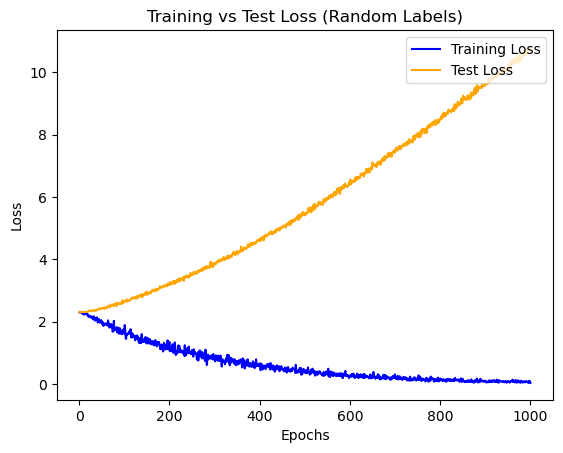

In [2]:
# Plotting the results
output_path = "./output/"
plt.plot(epoch_list, train_losses, color="blue")
plt.plot(epoch_list, test_losses, color="orange")
plt.legend(['Training Loss', 'Test Loss'], loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Test Loss (Random Labels)", color="black")
plt.savefig(output_path + 'random_mnist_loss_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()
